# Smoothed source models for Nath & Thingbaijam (2012)

Investigate and visualize models.

Note: For imports to work, ../utilities directory must be added to PYTHONPATH

_Copyright (C) 2014-2018 Nick Ackerley_

_This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as
published by the Free Software Foundation, either version 3 of the
License, or (at your option) any later version._

_This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU Affero General Public License for more details._

_You should have received a copy of the GNU Affero General Public 
License along with this program. If not, see 
<https://www.gnu.org/licenses/>._

In [16]:
import os
# import sys
from time import time
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize

from source_model_tools import csv2areal, csv2points, extract_param
from toolbox import annotate, logspace, linspace

%matplotlib inline

In [2]:
MIN_MAGS = [4.5, 5.5]
LAYERS_DF = pd.read_csv('layers.csv', index_col='layerid')
USE_RECOMPUTED = False

In [3]:
model_path = '../Data/nath2012probabilistic'
if USE_RECOMPUTED:
    smoothed_model_path = '../Smoothed/Recomputed'
else:
    smoothed_model_path = model_path

smoothed_data_template = os.path.join(smoothed_model_path,
                                      'lay%dsmooth%.1f.txt')

smoothed_source_data_file = 'smoothed_source_model'

## Load model data

In [4]:
model_basename = ' '.join((os.path.split(smoothed_model_path)[1],
                           smoothed_source_data_file))
smoothed_df = csv2points(model_basename)

Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/nath2012probabilistic_smoothed_source_model_mmin4.5_layer1.csv
Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/nath2012probabilistic_smoothed_source_model_mmin4.5_layer2.csv
Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/nath2012probabilistic_smoothed_source_model_mmin4.5_layer3.csv
Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/nath2012probabilistic_smoothed_source_model_mmin4.5_layer4.csv
Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/nath2012probabilistic_smoothed_source_model_mmin5.5_layer1.csv
Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/nath2012probabilistic_smoothed_source_model_mmin5.5_layer2.csv
Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/nath2012probabilistic_smoothed_source_model_mmin5.5_layer3.csv
Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/nath2012probabi

In [5]:
areal_csv = 'areal_source_model.csv'
areal_df = csv2areal(areal_csv)

# grab mmax and bvalue from zone above if mmax zero for this zone
check_keys = ['mmax', 'b']
for i, area_series in areal_df[
        (areal_df[check_keys] == 0).any(axis=1)].iterrows():
    alternate_zone = int(area_series.name/10)
    for key in check_keys:
        if area_series[key] == 0:
            print('For zone %d taking %s from zone %d' %
                  (area_series.name, key, alternate_zone))
            areal_df.at[i, key] = areal_df.at[alternate_zone, key]

# in some cases we are only interested in the active zones
active_areal_df = areal_df[areal_df['a'] != 0]

active_areal_df.head()

Reading:
	/home/nick/Desktop/indian-subcontinent-psha/Source Models/areal_source_model.csv
For zone 9031 taking mmax from zone 903
For zone 9031 taking b from zone 903
For zone 9081 taking mmax from zone 908
For zone 9081 taking b from zone 908
For zone 9131 taking mmax from zone 913
For zone 9131 taking b from zone 913
For zone 9151 taking mmax from zone 915
For zone 9151 taking b from zone 915
For zone 9171 taking mmax from zone 917
For zone 9171 taking b from zone 917


,layerid,a,b,stdb,mmax,stdmmax,strike,dip,rake,geometry,...,mechanism,new style,strike2,dip2,rake2,mechanism2,mmin,centroid,source_name,id
zoneid,,,,,,,,,,,,,,,,,,,,,
1,1,5.20,1.05,0.07,8.0,0.4,202.0,73.0,30.0,"POLYGON ((67.81 37.55, 68.3 38.82, 72.95 39.99...",...,dextral,strike-slip,102.4,61.4,160.6,dextral,4.5,POINT (70.44 38.79),zone 1,z1
2,1,4.64,0.93,0.09,8.0,0.4,306.0,31.0,142.0,"POLYGON ((72.95 39.99, 76.53 39.99, 76.0999999...",...,reverse,reverse,69.8,71.5,64.7,reverse,4.5,POINT (74.79 39.23),zone 2,z2
3,1,3.75,0.77,0.05,8.0,0.4,59.0,89.0,33.0,"POLYGON ((76.09999999999999 38.89, 76.53 39.99...",...,reverse,reverse,328.4,57.0,178.8,dextral,4.5,POINT (77.66 39.43),zone 3,z3
4,1,4.34,0.98,0.08,7.4,0.4,309.0,56.0,177.0,"POLYGON ((75.84999999999999 37.89, 76.09999999...",...,dextral,reverse,40.7,87.5,34.0,reverse,4.5,POINT (80.41 37.46),zone 4,z4
5,1,4.29,0.91,0.08,7.8,0.4,274.0,55.0,148.0,"POLYGON ((67.29000000000001 35.43, 67.81 37.55...",...,reverse,reverse,23.7,64.3,39.5,reverse,4.5,POINT (68.78 36.84),zone 5,z5


In [6]:
print('Reading completeness tables.')
completeness_df = pd.read_csv(
    '../Data/thingbaijam2011seismogenic/Table1.csv',
    header=[0, 1], index_col=[0, 1])
completeness_df.columns = [' '.join(col).strip()
                           for col in completeness_df.columns.values]
display(completeness_df)

Reading completeness tables.


,,4 start,4 end,4.5 start,4.5 end,5.5 start,5.5 end
zmin,zmax,,,,,,
0,25,1994,2008,1964,2008,1903,2008
25,70,1990,2008,1964,2008,1902,2008
70,180,1996,2008,1964,2008,1914,2008
180,300,1984,2008,1970,2008,1912,2008


## Plot histograms of $\lambda$

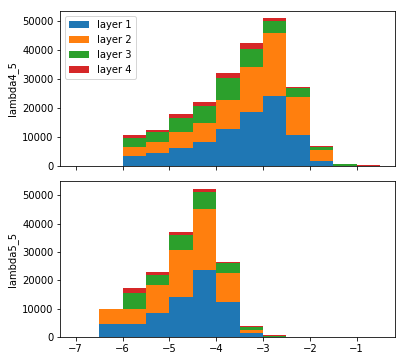

In [7]:
prop = 'lambda'
fig, axes = plt.subplots(nrows=len(MIN_MAGS), ncols=1,
                         figsize=(6, 3*len(MIN_MAGS)), sharex=True)
fig.subplots_adjust(hspace=0.1)
for min_mag, ax in zip(MIN_MAGS, axes):
    groups = smoothed_df[
        smoothed_df['mmin model'] == min_mag].groupby('layerid')
    data = [np.log10(group[prop]).values for _, group in groups]
    labels = ['layer %d' % id for id, _ in groups]
    ax.hist(data, label=labels, stacked=True, bins=np.arange(-7, 0, 0.5))
    ax.set_ylabel(('%s%g' % (prop, min_mag)).replace('.', '_'))
axes[0].legend(loc='upper left');

## Query a zone

In [8]:
zone_id = 118
fmd_cols = ['layerid', 'a', 'b', 'stdb', 'mmax', 'stdmmax',
            'mmin', 'geometry']
display(active_areal_df[fmd_cols].loc[zone_id])

min_mag = 4.5
n_points_zone = ((smoothed_df['mmin model'] == min_mag) &
                 (smoothed_df['in zoneid'] == zone_id)).sum()
print('Points in zone %d: %d' % (zone_id, n_points_zone))

layerid                                                     2
a                                                        4.67
b                                                        1.05
stdb                                                     0.12
mmax                                                      7.2
stdmmax                                                   0.4
mmin                                                      4.5
geometry    POLYGON ((93.47 26.91, 94.06999999999999 26.1,...
Name: 118, dtype: object

Points in zone 118: 211


## Compare activity rates

The truncated Gutenberg-Richter magnitude-frequency distribution in
OpenQuake implements
    $$\lambda(m \geq M) = 10^{a - b m} = e^{\alpha - \beta m}$$
where, since $\lambda$ is an annual rate, $10^a$ is too. If we ignore
events below some threshold $m_{min}$ then the annual rate becomes
    $$\lambda(m \geq m_{min}) = e^{\alpha - \beta m_{min}}
    e^{-\beta (m - m_{min})} = \nu e^{-\beta (m - m_{min})} $$
Thus to compute the $a$ value required by OpenQuake from the activity
rate $\lambda$ for a given magnitude threshold, we must also take into
account the $b$ value for the zone:
    $$a = \log_{10}(\lambda) + b m_{min}$$
If instead what is provided is event counts $\nu$ over some catalog
duration $T$, then one simply computes $\lambda = \nu/T$

In [9]:
# for each area in the areal model: count the number of points and
# sum the activity rates in the smoothed model. from the latter estimate
# an equivalent a-value
for min_mag, min_mag_df in smoothed_df.groupby('mmin model'):
    zone_dfs = min_mag_df.groupby('in zoneid')
    stats_df = zone_dfs.agg({'mmin': len, 'lambda': np.sum})

    smoothed_n = 'smoothed N ' + str(min_mag)
    smoothed_lambda = 'smoothed lambda ' + str(min_mag)

    stats_df.rename(columns={'mmin': smoothed_n,
                             'lambda': smoothed_lambda},
                    inplace=True)
    stats_df['zoneid'] = stats_df.index
    areal_df = pd.merge(areal_df, stats_df, left_index=True, right_on='zoneid')
    areal_df.drop(columns=['zoneid'], inplace=True)

    areal_df['smoothed a ' + str(min_mag)] = (
        np.log10(areal_df[smoothed_lambda]) +
        areal_df['b']*min_mag).round(2)
    areal_df['equiv a ' + str(min_mag)] = (
        areal_df['a']/areal_df[smoothed_n]).round(2)
    areal_df['areal lambda ' + str(min_mag)] = (
        10**(areal_df['a'] - areal_df['b']*min_mag)).round(4)
    areal_df[smoothed_lambda] = areal_df[smoothed_lambda].round(4)

## Query a point

... stick a pin through the layer cake.

In [13]:
this_lon_lat = ((smoothed_df['longitude'] == 98.0) &
                (smoothed_df['latitude'] == 3.8))
display_drop = ([item for item in smoothed_df.columns if item.startswith('logN')] + 
                ['in zoneid', 'zmax', 'zmin', 'aspect ratio', 'mmin model'])
display(smoothed_df[this_lon_lat].drop(display_drop, axis=1))

,longitude,latitude,nu,mmin,duration,lambda,distance,zoneid,tectonic subregion,a,...,stdb,mmax,stdmmax,rake,dip,strike,msr,source_name,id,layerid
88615,98.0,3.8,0.1102,4.5,45,0.002449,0.0,58.0,active shallow crust strike-slip reverse,1.664000,...,0.06,8.4,0.4,180.0,75.0,151.0,WC1994,3.8N 98E 0-25 km depth,3p8N_98E_1,1
172070,98.0,3.8,0.1601,4.5,45,0.003558,0.0,138.0,subduction interface,2.501200,...,0.09,8.3,0.3,18.0,80.0,64.0,StrasserInterface,3.8N 98E 25-70 km depth,3p8N_98E_2,2
212244,98.0,3.8,0.2669,4.5,45,0.005931,0.0,167.0,subduction intraslab,2.588100,...,0.09,8.0,0.3,46.0,49.0,206.0,StrasserIntraslab,3.8N 98E 70-180 km depth,3p8N_98E_3,3
222803,98.0,3.8,0.0452,4.5,39,0.001159,0.0,172.0,subduction intraslab,0.934070,...,0.10,8.0,0.3,-50.0,64.0,99.0,StrasserIntraslab,3.8N 98E 180-300 km depth,3p8N_98E_4,4
290856,98.0,3.8,0.0171,5.5,106,0.000161,0.0,58.0,active shallow crust strike-slip reverse,1.432700,...,0.06,8.4,0.4,180.0,75.0,151.0,WC1994,3.8N 98E 0-25 km depth,3p8N_98E_1,1
360631,98.0,3.8,0.0282,5.5,107,0.000264,0.0,138.0,subduction interface,2.470900,...,0.09,8.3,0.3,18.0,80.0,64.0,StrasserInterface,3.8N 98E 25-70 km depth,3p8N_98E_2,2
386560,98.0,3.8,0.0136,5.5,95,0.000143,0.0,167.0,subduction intraslab,2.040800,...,0.09,8.0,0.3,46.0,49.0,206.0,StrasserIntraslab,3.8N 98E 70-180 km depth,3p8N_98E_3,3
392840,98.0,3.8,0.0021,5.5,97,0.000022,0.0,172.0,subduction intraslab,0.065448,...,0.10,8.0,0.3,-50.0,64.0,99.0,StrasserIntraslab,3.8N 98E 180-300 km depth,3p8N_98E_4,4


## Write summary

In [17]:
activity_file = os.path.join(
    smoothed_model_path, 'activity_rates_by_zone_areal_vs_smoothed.csv')
print('Writing activity summary to:\n\t%s' % activity_file)
activity_df = areal_df[[
    'layerid', 'areal lambda 4.5', 'areal lambda 5.5',
    'smoothed lambda 4.5', 'smoothed lambda 5.5', 'smoothed N 4.5',
    'smoothed N 5.5']]
activity_df = activity_df.rename(
    columns={'areal lambda 4.5': 'areal 4.5',
             'smoothed lambda 4.5': 'smoothed 4.5',
             'areal lambda 5.5': 'areal 5.5',
             'smoothed lambda 5.5': 'smoothed 5.5',
             'smoothed N 4.5': 'N 4.5',
             'smoothed N 5.5': 'N 5.5'})

activity_df = activity_df.reset_index()

for layer_id in LAYERS_DF.index:
    series = pd.Series(activity_df[
        activity_df['layerid'] == layer_id].sum(axis=0))
    series['layerid'] = layer_id
    series['in zoneid'] = 'All'
    activity_df = activity_df.append(series, ignore_index=True)

series = pd.Series(activity_df[activity_df['zoneid'] == 'All'].sum(axis=0))
series['layerid'] = 'All'
series['zoneid'] = 'All'
activity_df = activity_df.append(series, ignore_index=True)
activity_df['ratio 4.5'] = (activity_df['smoothed 4.5'] /
                            activity_df['areal 4.5']).round(2)
activity_df['ratio 5.5'] = (activity_df['smoothed 5.5'] /
                            activity_df['areal 5.5']).round(2)

activity_df.to_csv(activity_file)
display(HTML(activity_df.to_html(index=False)))

Writing activity summary to:
	../Data/nath2012probabilistic/activity_rates_by_zone_areal_vs_smoothed.csv


in zoneid,layerid,areal 4.5,areal 5.5,smoothed 4.5,smoothed 5.5,N 4.5,N 5.5,zoneid,ratio 4.5,ratio 5.5
1.0,1,2.9854,0.2661,7.0258,0.1064,542.0,542.0,NaN,2.350000e+00,0.400000
2.0,1,2.8510,0.3350,5.3521,0.1322,472.0,472.0,NaN,1.880000e+00,0.390000
3.0,1,1.9275,0.3273,3.0652,0.1099,313.0,313.0,NaN,1.590000e+00,0.340000
4.0,1,0.8511,0.0891,2.1228,0.0285,1566.0,1343.0,NaN,2.490000e+00,0.320000
5.0,1,1.5668,0.1928,3.3257,0.1212,486.0,486.0,NaN,2.120000e+00,0.630000
6.0,1,1.6032,0.1567,3.8683,0.0907,696.0,696.0,NaN,2.410000e+00,0.580000
7.0,1,1.0715,0.0891,2.9140,0.0365,1019.0,1005.0,NaN,2.720000e+00,0.410000
8.0,1,0.8913,0.1349,2.2855,0.1853,1746.0,1746.0,NaN,2.560000e+00,1.370000
9.0,1,1.2445,0.1679,2.8852,0.1171,498.0,498.0,NaN,2.320000e+00,0.700000
12.0,1,1.6218,0.3090,2.4715,0.0692,1064.0,1064.0,NaN,1.520000e+00,0.220000


## Compare areal and smoothed model activity rates layer by layer

In [ ]:
layer_activity_df = pd.DataFrame()
for layer_id in LAYERS_DF.index:
    in_areal_layer = areal_df['layerid'] == layer_id
    in_smoothed_layer = smoothed_df['layerid'] == layer_id
    in_a_zone = smoothed_df['distance'] == 0

    layer_series = pd.Series(name=layer_id)
    for min_mag in MIN_MAGS:

        this_model = smoothed_df['mmin model'] == min_mag
        layer_series['areal ' + str(min_mag)] = (
            10**(areal_df[in_areal_layer]['a'] -
                 areal_df[in_areal_layer]['b']*min_mag)).sum().round(1)
        layer_series['smoothed ' + str(min_mag)] = (
            smoothed_df[in_smoothed_layer & this_model & in_a_zone]['lambda']
            .sum().round(1))

    layer_activity_df = layer_activity_df.append(layer_series)

layer_activity_df.index.name = 'layerid'

layer_activity_df = layer_activity_df.append(pd.Series(
    layer_activity_df.sum(axis=0), name='Total'))
for min_mag in MIN_MAGS:
    layer_activity_df['ratio ' + str(min_mag)] = (
        layer_activity_df['smoothed ' + str(min_mag)] /
        layer_activity_df['areal ' + str(min_mag)]).round(2)

display(layer_activity_df)

## Read catalogue

In [ ]:
catalogue_df = pd.read_csv('../Catalogue/SACAT1900_2008v2.txt', sep='\t')
fig, ax = plt.subplots(figsize=(3, 3))
ax = catalogue_df['SHOCK_TYPE'].value_counts().plot(kind='pie', ax=ax)

## Augment catalogue with zone and layer info

In [ ]:
catalogue_df['geometry'] = [Point(lon, lat)
                            for lon, lat in zip(catalogue_df['LON'],
                                                catalogue_df['LAT'])]
layer_catalogue_gdfs = []
for layer_id, layer in LAYERS_DF.iterrows():
    layer_catalogue_gdf = gpd.GeoDataFrame(catalogue_df[
        (catalogue_df['DEPTH'] >= layer['zmin']) &
        (catalogue_df['DEPTH'] < layer['zmax'])], crs='WGS84')
    layer_areal_gdf = gpd.GeoDataFrame(
        areal_df[areal_df['layerid'] == layer_id]
        [['geometry', 'layerid']], crs='WGS84')
    layer_catalogue_gdfs.append(gpd.sjoin(layer_catalogue_gdf,
                                          layer_areal_gdf, how='left'))
catalogue_df = pd.concat(layer_catalogue_gdfs).drop('geometry')
catalogue_df.rename(columns={'index_right': 'zoneid',
                             'layerid_right': 'layerid'}, inplace=True)
catalogue_df.drop('layerid', axis=1, inplace=True)

display(pd.concat((catalogue_df.head(),
                   catalogue_df.tail())))

# Compute activity rates from catalogue

In [ ]:
catalogue_activity_df = pd.DataFrame()
for layer_id, layer in LAYERS_DF.join(completeness_df,
                                      on=['zmin', 'zmax']).iterrows():
    layer_results = pd.Series()
    for min_mag in reversed(MIN_MAGS):
        above_thresh = catalogue_df['MAG_MW'] >= min_mag
        start = layer[str(min_mag) + ' start']
        end = layer[str(min_mag) + ' end']
        at_depth = ((catalogue_df['DEPTH'] >= layer['zmin']) &
                    (catalogue_df['DEPTH'] < layer['zmax']))
        in_years = ((catalogue_df['YEAR'] >= start) &
                    (catalogue_df['YEAR'] <= end))
        in_a_zone = catalogue_df['zoneid'] != -1
        is_mainshock = catalogue_df['SHOCK_TYPE'] == 'Mainshock'
        subcat_df = catalogue_df[
            above_thresh & at_depth & in_years & in_a_zone & is_mainshock]
        layer_results = layer_results.append(pd.Series({
            'catalogue ' + str(min_mag):
                round(float(len(subcat_df))/(end - start + 1), 1),
            }, name=layer_id))
    catalogue_activity_df = catalogue_activity_df.append(layer_results,
                                                         ignore_index=True)
catalogue_activity_df = catalogue_activity_df.append(pd.Series(
    catalogue_activity_df.sum(axis=0), name='Total'))

summary_tex = os.path.join(
    smoothed_model_path,
    'activity_rates_by_layer_areal_vs_smoothed_vs_catalogue.tex')
activity_df = layer_activity_df.join(catalogue_activity_df)
model_type = [item.split()[0] for item in activity_df.columns]
model_type = ['catalogue' if item == 'cat' else item
              for item in model_type]
min_mag = [float(item.split()[1]) for item in activity_df.columns]
activity_df.columns = [min_mag, model_type]
multi_cols = pd.MultiIndex.from_tuples([
    (4.5, 'areal'), (4.5, 'smoothed'), (4.5, 'catalogue'),
    (5.5, 'areal'), (5.5, 'smoothed'), (5.5, 'catalogue'),
    ], names=['source', 'minimum magnitude'])
# activity_df[('layerid', 'minimum magnitude')] = activity_df.index
# activity_df.index = range(len(activity_df))

activity_df = activity_df[multi_cols]
display(activity_df)

print('Writing activity rates to:\n\t%s' % summary_tex)
activity_df.to_latex(summary_tex, index_names=True,)

## Plot histograms

In [ ]:
PLOT_PARAMS = ['a', 'b', 'nu', 'lambda']
LOG_PARAMS = ['nu', 'lambda']

for param in PLOT_PARAMS:
    all_data = smoothed_df[param].values
    if param in LOG_PARAMS:
        bins = logspace(np.nanmin(all_data), np.nanmax(all_data), 3)
    else:
        bins = linspace(np.nanmin(all_data), np.nanmax(all_data))

    fig, axes = plt.subplots(len(LAYERS_DF), len(MIN_MAGS),
                             figsize=(6.5, 8.5), squeeze=False,
                             sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0, wspace=0)
    for layer_id, row_axes in zip(LAYERS_DF.index, axes):
        for min_mag, ax in zip(MIN_MAGS, row_axes):
            annotate('layer %d mmin %g' % (layer_id, min_mag),
                     loc='upper right', ax=ax, prop={'size': 8})

            subset_indices = (
                (smoothed_df['mmin model'] == min_mag) &
                (smoothed_df['layerid'] == layer_id))

            ax.hist(smoothed_df[subset_indices][param],
                    bins=bins)
            if param in LOG_PARAMS:
                ax.set_xscale('log')

    for ax in axes[:, -1]:
        ax.set_xlabel(param)

# Plot maps

In [ ]:
for param in PLOT_PARAMS:

    all_data, longitudes, latitudes = extract_param(smoothed_df, param)
    if param in LOG_PARAMS:
        ticks = logspace(np.nanmin(all_data), np.nanmax(all_data), 3)
        norm = LogNorm(vmin=ticks[0], vmax=ticks[-1])
    else:
        ticks = linspace(np.nanmin(all_data), np.nanmax(all_data), 7)
        norm = Normalize(vmin=ticks[0], vmax=ticks[-1])

    extent = (longitudes[0], longitudes[-1], latitudes[0], latitudes[-1])

    fig, axes = plt.subplots(len(LAYERS_DF), len(MIN_MAGS),
                             figsize=(6.5, 8.5), squeeze=False,
                             sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0, wspace=0)
    for layer_id, row_axes in zip(LAYERS_DF.index, axes):
        for min_mag, ax in zip(MIN_MAGS, row_axes):
            annotate('layer %d mmin %g' % (layer_id, min_mag),
                     loc='lower left', ax=ax)
            subset_indices = (
                (smoothed_df['mmin model'] == min_mag) &
                (smoothed_df['layerid'] == layer_id))

            data = extract_param(smoothed_df[subset_indices], param)[0]
            image = ax.imshow(
                data, cmap='jet', origin='lower', aspect='equal',
                extent=extent, norm=norm)
            ax.grid()

    for ax in axes[:, 0]:
        ax.set_ylabel(u'Latitude (°N)')
    for ax in axes[-1, :]:
        ax.set_xlabel(u'Longitude (°E)')

    fig.colorbar(image, ax=axes.ravel().tolist(), label=param,
                 shrink=1/len(LAYERS_DF), ticks=ticks)